In [1]:
import os
import glob
import datetime
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
import import_ipynb
import Lib.Functions as fc
import Lib.Feature_Selection as ft
import warnings
warnings.filterwarnings('ignore')

importing Jupyter notebook from /Users/admin/Desktop/User_Acquisition/1. Code/Lib/Functions.ipynb
importing Jupyter notebook from /Users/admin/Desktop/User_Acquisition/1. Code/Lib/Feature_Selection.ipynb


In [2]:
fake_user = pd.read_csv('fake_paid_users.csv')
fake_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35153 entries, 0 to 35152
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UserID  35153 non-null  object
dtypes: object(1)
memory usage: 274.8+ KB


In [3]:
fake_lst = fake_user['UserID'].values.tolist()

# 1. User Information

In [4]:
df = pd.read_csv('Users.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187242 entries, 0 to 187241
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   UserID       187242 non-null  object
 1   ChildBday    187242 non-null  object
 2   ChildGender  187242 non-null  object
dtypes: object(3)
memory usage: 4.3+ MB


In [5]:
t0 = time.time()
df = df.loc[df['UserID'].map(lambda x: x not in fake_lst)]
t1 = time.time()

print('Filtering took: {:.2f} minutes.'.format((t1-t0)/60))

df.info()

Filtering took: 2.07 minutes.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 186634 entries, 0 to 187241
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   UserID       186634 non-null  object
 1   ChildBday    186634 non-null  object
 2   ChildGender  186634 non-null  object
dtypes: object(3)
memory usage: 5.7+ MB


In [6]:
df.head()

,UserID,ChildBday,ChildGender
0,e5be1228-cf16-451c-80a5-d1225aa6a230,2016-12-01,male
1,b588000b-c32a-442c-8192-a3167c8101a3,2017-12-01,male
2,76e614e8-88ac-4e9e-822a-cef168d3af29,2016-11-01,male
3,37f6c983-4780-4a20-83e3-09d900d8128d,2021-02-01,male
4,93b790c5-9623-41ed-846a-3475464ae2a2,2016-01-01,male


In [7]:
df['UserID'].value_counts().shape

(173193,)

In [8]:
df['ChildBday'].value_counts().shape

(4164,)

In [9]:
dup_val = len(df) - len(df.drop_duplicates())

if dup_val > 0:
    print('Before dropping duplicates: {} rows.'.format(len(df)))
    df = df.drop_duplicates()
    print('After dropping duplicates: {} rows.'.format(len(df)))
else:
    print('No duplicate values.')

Before dropping duplicates: 186634 rows.
After dropping duplicates: 183582 rows.


In [10]:
df['ChildBday'] = pd.to_datetime(df['ChildBday'])

In [11]:
df['ChildAge'] = df['ChildBday'].map(lambda x: round((pd.Timestamp.now() - x).days / 365, 1))

In [12]:
df.head()

,UserID,ChildBday,ChildGender,ChildAge
0,e5be1228-cf16-451c-80a5-d1225aa6a230,2016-12-01,male,6.4
1,b588000b-c32a-442c-8192-a3167c8101a3,2017-12-01,male,5.4
2,76e614e8-88ac-4e9e-822a-cef168d3af29,2016-11-01,male,6.5
3,37f6c983-4780-4a20-83e3-09d900d8128d,2021-02-01,male,2.2
4,93b790c5-9623-41ed-846a-3475464ae2a2,2016-01-01,male,7.3


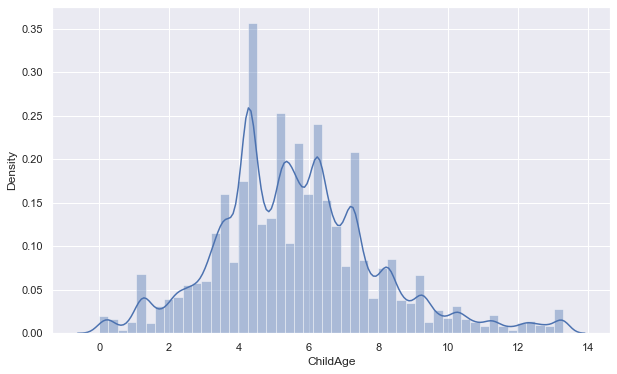

In [14]:
plt.figure(figsize=(10, 6))
sb.distplot(df['ChildAge']);

In [15]:
b = [int(x) for x in df['ChildAge'].values]

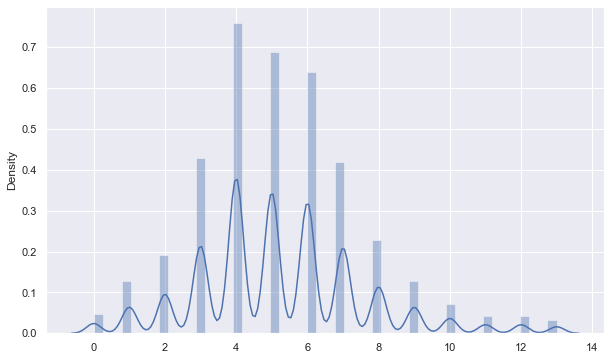

In [16]:
plt.figure(figsize=(10, 6))
sb.distplot(b);

In [38]:
df.to_csv('Clean_Users.csv', index = False)

# 2. User Mobile brands

In [17]:
devices = pd.read_csv('DeviceBrand.csv')
devices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232386 entries, 0 to 232385
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       232386 non-null  object
 1   1       232386 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [18]:
new_cols = ['UserID', 'Brand']

devices.columns = new_cols

In [19]:
t0 = time.time()
devices = devices.loc[devices['UserID'].map(lambda x: x not in fake_lst)]
t1 = time.time()

print('Filtering took: {:.2f} minutes.'.format((t1-t0)/60))

devices.info()

Filtering took: 2.45 minutes.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 231765 entries, 0 to 232385
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   UserID  231765 non-null  object
 1   Brand   231765 non-null  object
dtypes: object(2)
memory usage: 5.3+ MB


In [20]:
devices.head()

,UserID,Brand
0,98af826b-1133-4b32-a560-bc312e80fd26,apple
1,1359b19f-0ba7-46fa-8477-8ab8ef966f08,samsung
2,14be2879-edf8-4779-a303-9c60034b7dac,apple
3,3edce4a5-cba9-4751-8c9f-cc2f31032141,apple
4,5618ba32-50a5-46f0-a4c0-b2eea3dfd498,oppo


In [21]:
devices['UserID'].value_counts().shape

(224440,)

In [22]:
brand_series = devices['Brand'].value_counts()
brand_series.head(15)

samsung    75986
apple      58374
oppo       44714
vivo       13718
redmi       9758
realme      6841
xiaomi      5966
vsmart      5502
huawei      2587
nokia       1507
lenovo      1373
poco         826
masstel      821
lge          531
sony         310
Name: Brand, dtype: int64

In [23]:
top15_brand = brand_series[brand_series >= 300].index.tolist()
top15_brand

['samsung',
 'apple',
 'oppo',
 'vivo',
 'redmi',
 'realme',
 'xiaomi',
 'vsmart',
 'huawei',
 'nokia',
 'lenovo',
 'poco',
 'masstel',
 'lge',
 'sony']

In [24]:
devices.loc[devices['Brand'].map(lambda x: x not in top15_brand), 'Brand'] = 'Others'

In [25]:
devices['Brand'].value_counts()

samsung    75986
apple      58374
oppo       44714
vivo       13718
redmi       9758
realme      6841
xiaomi      5966
vsmart      5502
Others      2951
huawei      2587
nokia       1507
lenovo      1373
poco         826
masstel      821
lge          531
sony         310
Name: Brand, dtype: int64

In [61]:
devices.to_csv('Clean_Brands.csv', index = False)

In [26]:
cnt = [1] * devices.shape[0]

devices['Counting'] = cnt

In [27]:
tmp = pd.DataFrame(devices.groupby(['UserID', 'Brand'])['Counting'].sum().reset_index())
tmp

,UserID,Brand,Counting
0,00002520-3fe9-4d4b-9e1f-e4a72386bf47,realme,1
1,00007f9f-be36-4a0d-a2a8-167231588625,samsung,1
2,00015787-1ed9-45b9-9c5f-2613e2ca8409,samsung,1
3,0001c76a-806c-4818-99eb-dbdaa196288d,samsung,1
4,000234a9-a233-4476-9023-9b83f331b7f6,apple,1
...,...,...,...
231745,ffff588b-6a96-4cc1-9aac-9741f512eaa2,oppo,1
231746,ffff81a7-4938-4d26-8492-bd8e4acc2a19,apple,1
231747,ffffbd84-934c-496d-bf25-f9329bc39fc1,oppo,1
231748,ffffd6e4-345a-4222-932a-a97f6b5b193d,samsung,1


In [28]:
devices_pivot = tmp.pivot_table(index = 'UserID',
                                columns = 'Brand',
                                values = ['Counting'],
                                aggfunc = np.sum)

In [29]:
devices_pivot = devices_pivot.reset_index()
devices_pivot

UserID Counting                          \
Brand                                          Others apple huawei lenovo lge   
0       00002520-3fe9-4d4b-9e1f-e4a72386bf47      NaN   NaN    NaN    NaN NaN   
1       00007f9f-be36-4a0d-a2a8-167231588625      NaN   NaN    NaN    NaN NaN   
2       00015787-1ed9-45b9-9c5f-2613e2ca8409      NaN   NaN    NaN    NaN NaN   
3       0001c76a-806c-4818-99eb-dbdaa196288d      NaN   NaN    NaN    NaN NaN   
4       000234a9-a233-4476-9023-9b83f331b7f6      NaN   1.0    NaN    NaN NaN   
...                                      ...      ...   ...    ...    ...  ..   
224435  ffff588b-6a96-4cc1-9aac-9741f512eaa2      NaN   NaN    NaN    NaN NaN   
224436  ffff81a7-4938-4d26-8492-bd8e4acc2a19      NaN   1.0    NaN    NaN NaN   
224437  ffffbd84-934c-496d-bf25-f9329bc39fc1      NaN   NaN    NaN    NaN NaN   
224438  ffffd6e4-345a-4222-932a-a97f6b5b193d      NaN   NaN    NaN    NaN NaN   
224439  ffffd834-3f54-4dc9-87bb-e57dea98a7b1      NaN   NaN    NaN    NaN NaN   

                                                                             
Brand  masstel nokia oppo poco realme redmi samsung sony vivo vsmart xiaomi  
0          NaN   NaN  NaN  NaN    1.0   NaN     NaN  NaN  NaN    NaN    NaN  
1          NaN   NaN  NaN  NaN    NaN   NaN     1.0  NaN  NaN    NaN    NaN  
2          NaN   NaN  NaN  NaN    NaN   NaN     1.0  NaN  NaN    NaN    NaN  
3          NaN   NaN  NaN  NaN    NaN   NaN     1.0  NaN  NaN    NaN    NaN  
4          NaN   NaN  NaN  NaN    NaN   NaN     NaN  NaN  NaN    NaN    NaN  
...        ...   ...  ...  ...    ...   ...     ...  ...  ...    ...    ...  
224435     NaN   NaN  1.0  NaN    NaN   NaN     NaN  NaN  NaN    NaN    NaN  
224436     NaN   NaN  NaN  NaN    NaN   NaN     NaN  NaN  NaN    NaN    NaN  
224437     NaN   NaN  1.0  NaN    NaN   NaN     NaN  NaN  NaN    NaN    NaN  
224438     NaN   NaN  NaN  NaN    NaN   NaN     1.0  NaN  NaN    NaN    NaN  
224439     NaN   NaN  NaN  NaN    NaN   NaN     1.0  NaN  NaN    NaN    NaN  

[224440 rows x 17 columns]

In [30]:
devices_pivot.columns

MultiIndex([(  'UserID',        ''),
            ('Counting',  'Others'),
            ('Counting',   'apple'),
            ('Counting',  'huawei'),
            ('Counting',  'lenovo'),
            ('Counting',     'lge'),
            ('Counting', 'masstel'),
            ('Counting',   'nokia'),
            ('Counting',    'oppo'),
            ('Counting',    'poco'),
            ('Counting',  'realme'),
            ('Counting',   'redmi'),
            ('Counting', 'samsung'),
            ('Counting',    'sony'),
            ('Counting',    'vivo'),
            ('Counting',  'vsmart'),
            ('Counting',  'xiaomi')],
           names=[None, 'Brand'])

In [31]:
cols = [x[1] for x in devices_pivot.columns]
cols[0] = 'UserID'
cols

['UserID',
 'Others',
 'apple',
 'huawei',
 'lenovo',
 'lge',
 'masstel',
 'nokia',
 'oppo',
 'poco',
 'realme',
 'redmi',
 'samsung',
 'sony',
 'vivo',
 'vsmart',
 'xiaomi']

In [32]:
devices_pivot.columns = cols

devices_pivot.head()

,UserID,Others,apple,huawei,lenovo,lge,masstel,nokia,oppo,poco,realme,redmi,samsung,sony,vivo,vsmart,xiaomi
0,00002520-3fe9-4d4b-9e1f-e4a72386bf47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,00007f9f-be36-4a0d-a2a8-167231588625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,00015787-1ed9-45b9-9c5f-2613e2ca8409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,0001c76a-806c-4818-99eb-dbdaa196288d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,000234a9-a233-4476-9023-9b83f331b7f6,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
for col in devices_pivot.columns[1:]:
    devices_pivot.loc[devices_pivot[col].isnull(), col] = 0

In [34]:
devices_pivot.shape

(224440, 17)

In [35]:
devices_pivot.head()

,UserID,Others,apple,huawei,lenovo,lge,masstel,nokia,oppo,poco,realme,redmi,samsung,sony,vivo,vsmart,xiaomi
0,00002520-3fe9-4d4b-9e1f-e4a72386bf47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00007f9f-be36-4a0d-a2a8-167231588625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,00015787-1ed9-45b9-9c5f-2613e2ca8409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0001c76a-806c-4818-99eb-dbdaa196288d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,000234a9-a233-4476-9023-9b83f331b7f6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
groups = pd.DataFrame(devices.groupby('UserID')['Brand'].count().reset_index()).sort_values('Brand', ascending = False)
groups

,UserID,Brand
41885,2fd5928c-5d4b-46ae-84f8-058622720a27,12
32072,24a1f3a6-68d2-437e-aae8-0a33ef64ff14,6
178237,cb757b9a-24e2-4e72-b0d8-6004f84fd862,5
59,00125ee4-9a93-465e-8e7a-556d1d6ca10e,5
207528,eca871b6-1413-4e68-a580-8e198430329a,5
...,...,...
75922,56a888d4-f565-4a42-bad5-9c61d8ace8e7,1
75923,56a8f236-1ee2-4055-b53e-66b1c05cfbca,1
75924,56a933c7-b6f6-4028-ab32-fb38271501f5,1
75925,56a9448f-32b6-4ff6-9bde-2281dd9c4376,1


In [67]:
groups.sort_values('UserID', ascending=True)

,UserID,Brand
0,00002520-3fe9-4d4b-9e1f-e4a72386bf47,1
1,00007f9f-be36-4a0d-a2a8-167231588625,1
2,00015787-1ed9-45b9-9c5f-2613e2ca8409,1
3,0001c76a-806c-4818-99eb-dbdaa196288d,1
4,000234a9-a233-4476-9023-9b83f331b7f6,1
...,...,...
224435,ffff588b-6a96-4cc1-9aac-9741f512eaa2,1
224436,ffff81a7-4938-4d26-8492-bd8e4acc2a19,1
224437,ffffbd84-934c-496d-bf25-f9329bc39fc1,1
224438,ffffd6e4-345a-4222-932a-a97f6b5b193d,1


In [47]:
brand_ser = devices['Brand'].value_counts()
brand_names = [x.capitalize() for x in brand_ser.index]

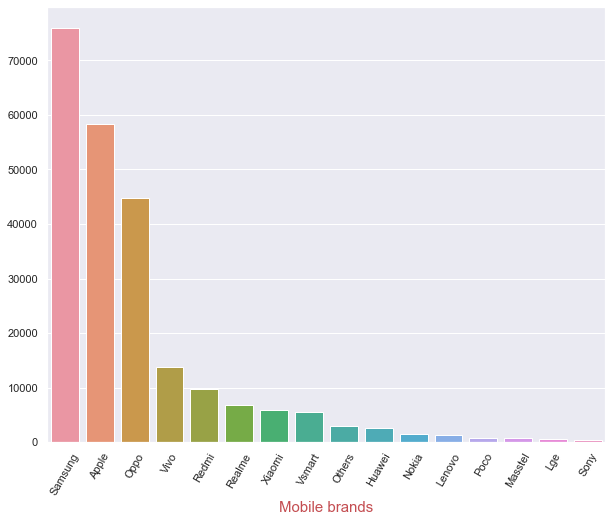

In [60]:
plt.figure(figsize=(10, 8))
sb.barplot(x = brand_names, y = brand_ser.values)
plt.xlabel('Mobile brands', fontsize=15, color = 'r')
plt.xticks(rotation = 60);

In [62]:
df.head()

,UserID,ChildBday,ChildGender,ChildAge
0,e5be1228-cf16-451c-80a5-d1225aa6a230,2016-12-01,male,6.4
1,b588000b-c32a-442c-8192-a3167c8101a3,2017-12-01,male,5.4
2,76e614e8-88ac-4e9e-822a-cef168d3af29,2016-11-01,male,6.5
3,37f6c983-4780-4a20-83e3-09d900d8128d,2021-02-01,male,2.2
4,93b790c5-9623-41ed-846a-3475464ae2a2,2016-01-01,male,7.3


In [64]:
df.shape

(183582, 4)

In [63]:
devices.head()

,UserID,Brand,Counting
0,98af826b-1133-4b32-a560-bc312e80fd26,apple,1
1,1359b19f-0ba7-46fa-8477-8ab8ef966f08,samsung,1
2,14be2879-edf8-4779-a303-9c60034b7dac,apple,1
3,3edce4a5-cba9-4751-8c9f-cc2f31032141,apple,1
4,5618ba32-50a5-46f0-a4c0-b2eea3dfd498,oppo,1


In [65]:
devices.shape

(231765, 3)

In [113]:
df_merge = pd.merge(df, devices)
df_merge.shape

(183108, 6)

In [105]:
df_merge.isnull().sum()

UserID             0
ChildBday          0
ChildGender        0
ChildAge           0
Others         10502
apple          10502
huawei         10502
lenovo         10502
lge            10502
masstel        10502
nokia          10502
oppo           10502
poco           10502
realme         10502
redmi          10502
samsung        10502
sony           10502
vivo           10502
vsmart         10502
xiaomi         10502
dtype: int64

In [102]:
234528 - 61448

173080

In [97]:
df_merge.loc[df_merge['Others'].isnull()]

,UserID,ChildBday,ChildGender,ChildAge,Others,apple,huawei,lenovo,lge,masstel,nokia,oppo,poco,realme,redmi,samsung,sony,vivo,vsmart,xiaomi
43,ca7d42f4-3db6-4623-962c-2a29f8cb8ead,2020-05-01,male,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,c4a2c2b8-a0c5-4491-a0f9-b64f8e290f82,2018-04-01,male,5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,9c2b70f0-a8bd-4a8b-81fa-d403994d4f00,2019-12-01,male,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2707,0e471346-794d-4a4f-86e1-9a08c3a8b030,2020-05-01,male,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5212,9f2bf03b-80de-4712-8d67-69935083468c,2012-01-01,female,11.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181358,4619e4c3-a968-4dfb-aa02-4a2d4a15f635,2020-03-01,male,3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181663,649fb0c5-506b-422f-ad13-83493fea16d6,2018-02-01,male,5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182414,15c00a9e-5bb1-4059-b58c-1540869a1a86,2018-05-01,male,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182640,518493ab-7d5a-4f64-b831-5d6029401c90,2019-01-01,male,4.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df_merge.shape[0] - 10502

183108

In [73]:
df.shape[0]

183582

In [86]:
df['UserID'].unique().size

173193

In [89]:
devices_pivot['UserID'].unique().size

224440

In [98]:
df.head()

,UserID,ChildBday,ChildGender,ChildAge
0,e5be1228-cf16-451c-80a5-d1225aa6a230,2016-12-01,male,6.4
1,b588000b-c32a-442c-8192-a3167c8101a3,2017-12-01,male,5.4
2,76e614e8-88ac-4e9e-822a-cef168d3af29,2016-11-01,male,6.5
3,37f6c983-4780-4a20-83e3-09d900d8128d,2021-02-01,male,2.2
4,93b790c5-9623-41ed-846a-3475464ae2a2,2016-01-01,male,7.3


In [107]:
195182-183582

11600

In [108]:
df

,UserID,ChildBday,ChildGender,ChildAge
0,e5be1228-cf16-451c-80a5-d1225aa6a230,2016-12-01,male,6.4
1,b588000b-c32a-442c-8192-a3167c8101a3,2017-12-01,male,5.4
2,76e614e8-88ac-4e9e-822a-cef168d3af29,2016-11-01,male,6.5
3,37f6c983-4780-4a20-83e3-09d900d8128d,2021-02-01,male,2.2
4,93b790c5-9623-41ed-846a-3475464ae2a2,2016-01-01,male,7.3
...,...,...,...,...
187237,42d95ee2-fbe7-4492-be5a-6b505269adc8,2019-09-23,male,3.6
187238,122ccaf6-2d2d-400e-bedd-41543b85b0b9,2018-06-05,female,4.9
187239,8917e237-3f0c-4d6d-beeb-73eb1cdd2aca,2019-08-22,male,3.7
187240,e3733f67-ede5-41d4-beef-884b2dd3b89a,2020-07-28,male,2.7
